# TIME - SERIES


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm


In [2]:
# Fetch data from Yahoo Finance library used
#Considering previous 5 years of data
tsla = yf.download('TSLA', start='2017-01-01', end='2023-01-01')

# Display the first few rows
print(tsla.head())

#Display last rows
print(tsla.head())

# Checking the shape of the dataset
print(f"Dataset shape: {tsla.shape}")

# Checking data types and null values
print(tsla.info())

[*********************100%***********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  14.324000  14.688667  14.064000  14.466000  14.466000   88849500
2017-01-04  14.316667  15.200000  14.287333  15.132667  15.132667  168202500
2017-01-05  15.094667  15.165333  14.796667  15.116667  15.116667   88675500
2017-01-06  15.128667  15.354000  15.030000  15.267333  15.267333   82918500
2017-01-09  15.264667  15.461333  15.200000  15.418667  15.418667   59692500
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2017-01-03  14.324000  14.688667  14.064000  14.466000  14.466000   88849500
2017-01-04  14.316667  15.200000  14.287333  15.132667  15.132667  168202500
2017-01-05  15.094667  15.165333  14.796667  15.116667  15.116667   88675500
2017-01-06  15.128667  15.354000  15.030000  15.267333  15.267333   82918500

In [5]:
# Descriptive statistics for numerical columns
print(tsla.describe())

              Open         High          Low        Close    Adj Close  \
count  1510.000000  1510.000000  1510.000000  1510.000000  1510.000000   
mean    113.469903   116.049684   110.605552   113.362145   113.362145   
std     115.419643   118.063079   112.409746   115.240834   115.240834   
min      12.073333    12.445333    11.799333    11.931333    11.931333   
25%      20.503333    20.916333    20.127334    20.580167    20.580167   
50%      28.556666    28.959666    27.439667    28.594666    28.594666   
75%     223.982498   229.290001   218.187496   223.654163   223.654163   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  1.510000e+03  
mean   1.262143e+08  
std    8.534860e+07  
min    2.940180e+07  
25%    7.321838e+07  
50%    9.868110e+07  
75%    1.451039e+08  
max    9.140820e+08  


In [7]:
# Calculate basic statistics for Opening Value
for i in tsla.columns.tolist():
    median = tsla[i].median()
    mode = tsla[i].mode()[0]
    quartiles = tsla[i].quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    skewness = skew(tsla[i])
    kurt = kurtosis(tsla[i])
    print(f"For {i} :\n Median: {median}, Mode: {mode}\n InterQuartileRange: {iqr}\n Skewness: {skewness}, Kurtosis: {kurt} ")

For Open :
 Median: 28.556666374206543, Mode: 24.0
 InterQuartileRange: 203.47916507720947
 Skewness: 0.7511420106083486, Kurtosis: -0.9651138335958498 
For High :
 Median: 28.95966625213623, Mode: 19.933332443237305
 InterQuartileRange: 208.37366819381714
 Skewness: 0.7505740348517633, Kurtosis: -0.9629169589224391 
For Low :
 Median: 27.439666748046875, Mode: 18.700000762939453
 InterQuartileRange: 198.0601625442505
 Skewness: 0.7503758914603063, Kurtosis: -0.9737599121881368 
For Close :
 Median: 28.594666481018066, Mode: 14.641332626342773
 InterQuartileRange: 203.07399654388428
 Skewness: 0.7500554931124146, Kurtosis: -0.9683074553772579 
For Adj Close :
 Median: 28.594666481018066, Mode: 14.641332626342773
 InterQuartileRange: 203.07399654388428
 Skewness: 0.7500554931124146, Kurtosis: -0.9683074553772579 
For Volume :
 Median: 98681100.0, Mode: 85110000
 InterQuartileRange: 71885550.0
 Skewness: 2.639969005117808, Kurtosis: 11.3657224709635 


UNIVARIATE ANALYSIS

Histograms for numerical columns

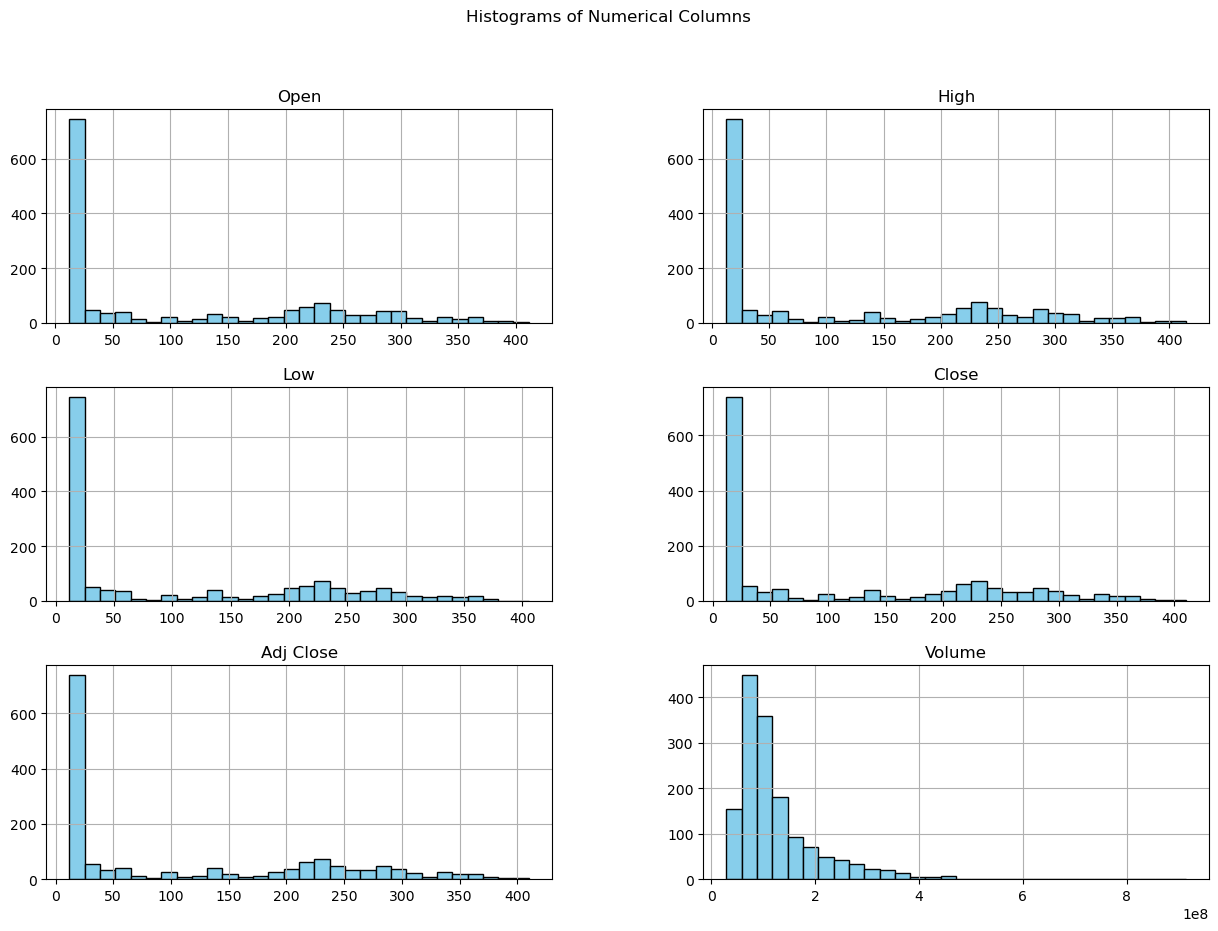

In [9]:
tsla.hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

FREQUENCY PLOYGONS

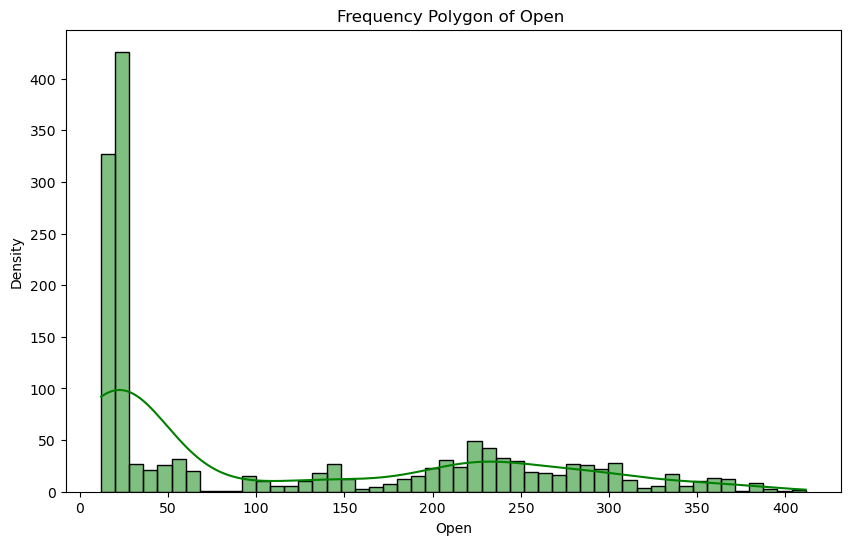

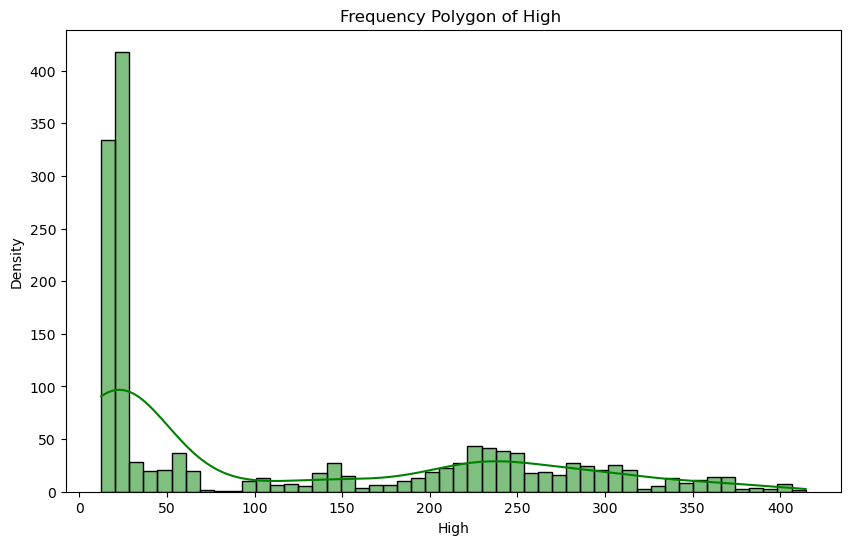

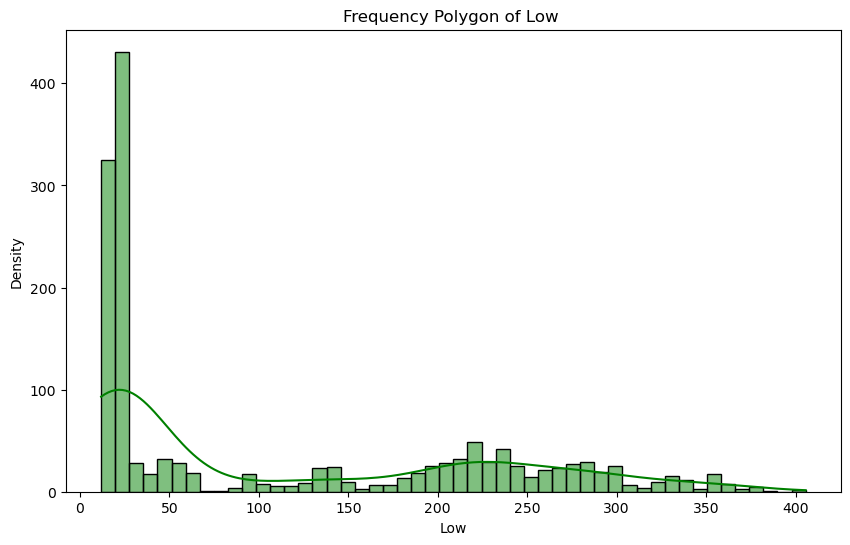

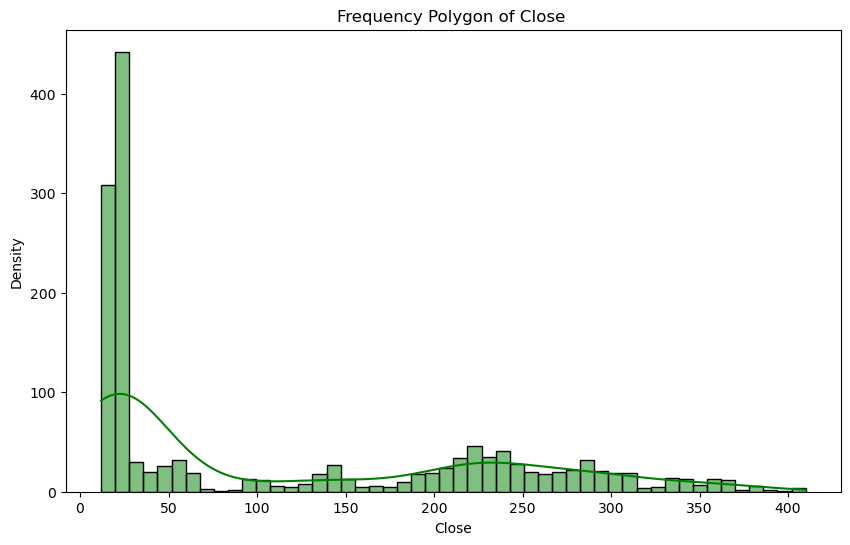

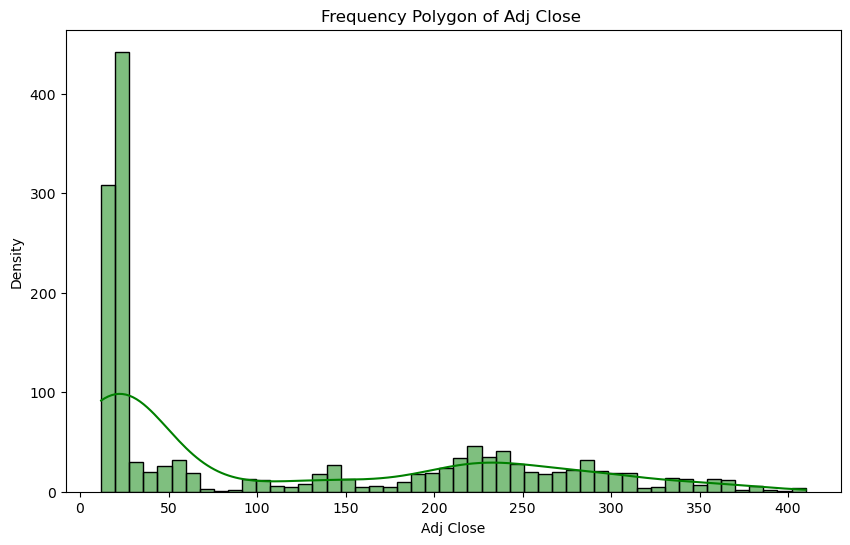

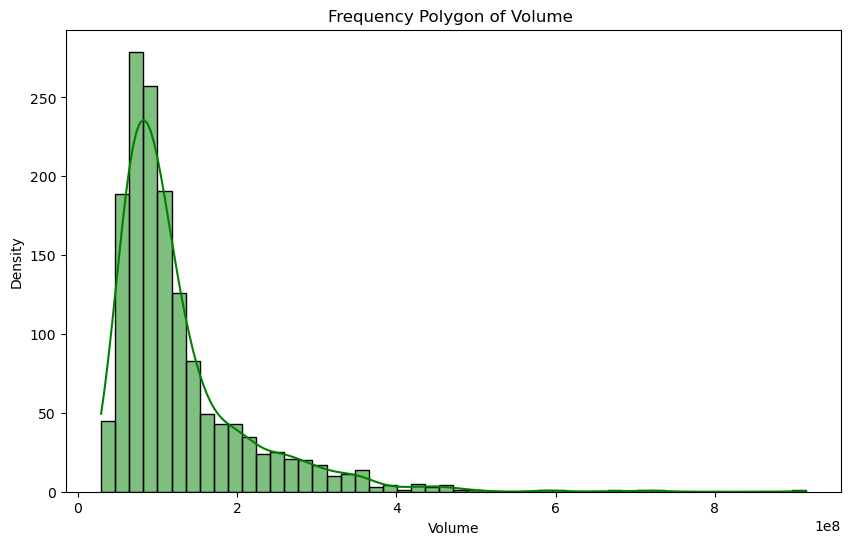

In [11]:
for i in tsla.columns.tolist():
    plt.figure(figsize=(10, 6))
    sns.histplot(tsla[i], bins=50, kde=True, color='green')
    plt.title(f'Frequency Polygon of {i} ')
    plt.xlabel(f'{i}')
    plt.ylabel('Density')
    plt.show()

In [ ]:
OGIVE CURVES

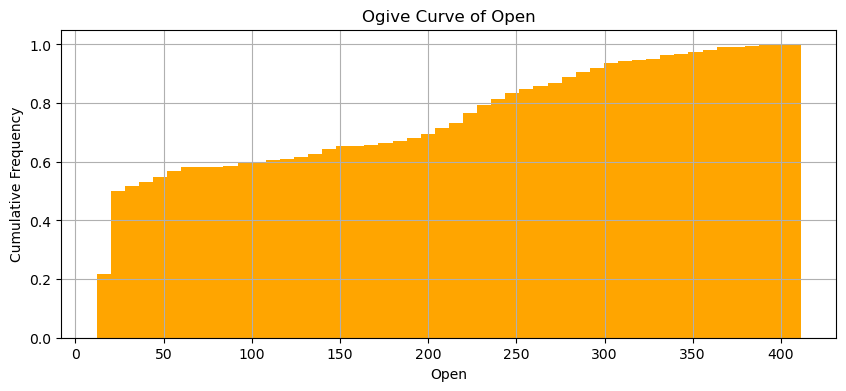

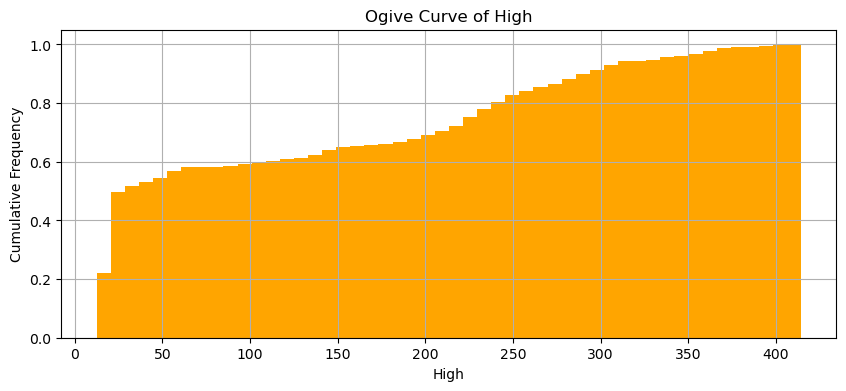

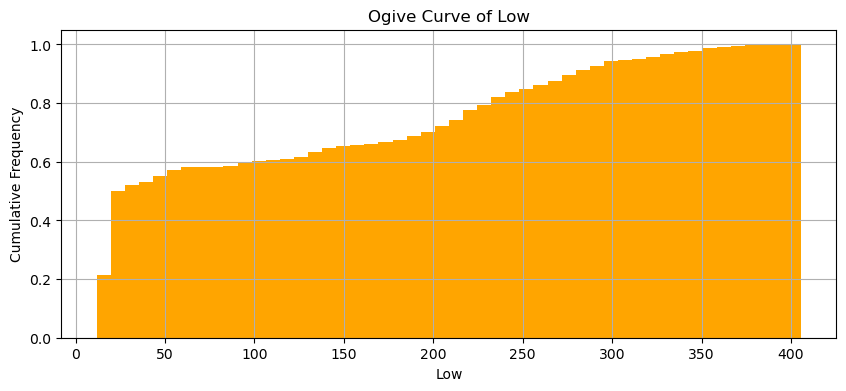

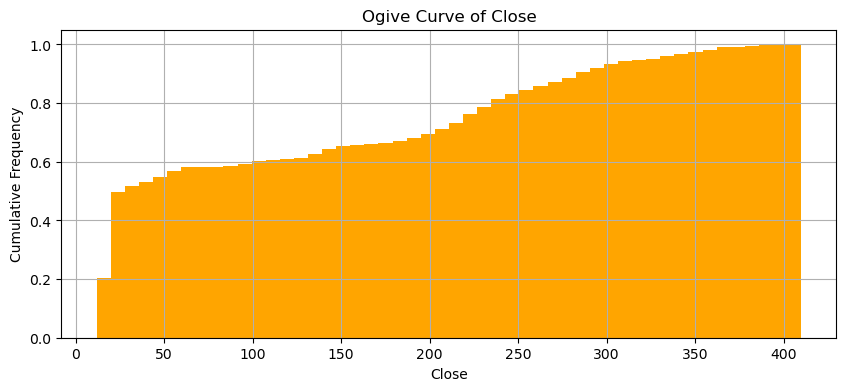

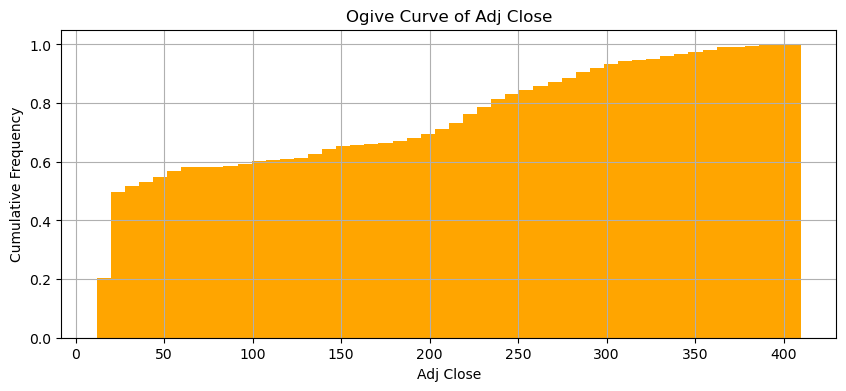

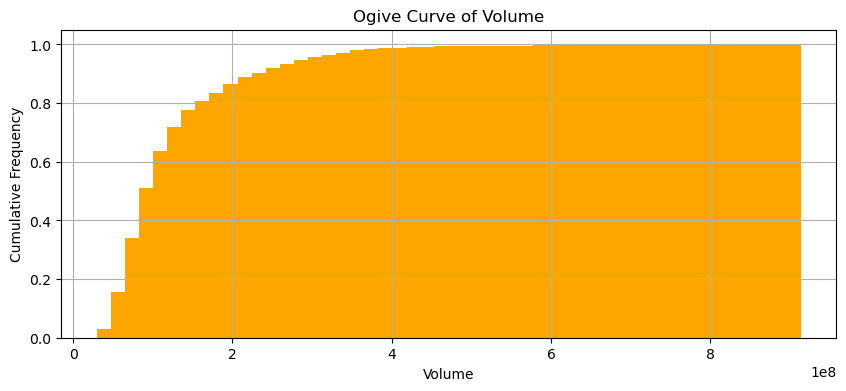

In [13]:
for i in tsla.columns.tolist():
    plt.figure(figsize=(10, 4))
    tsla[i].hist(cumulative=True, density=True, bins=50, color='orange')
    plt.title(f'Ogive Curve of {i}')
    plt.xlabel(f'{i}')
    plt.ylabel('Cumulative Frequency')
    plt.show()


SCATTER PLOTS

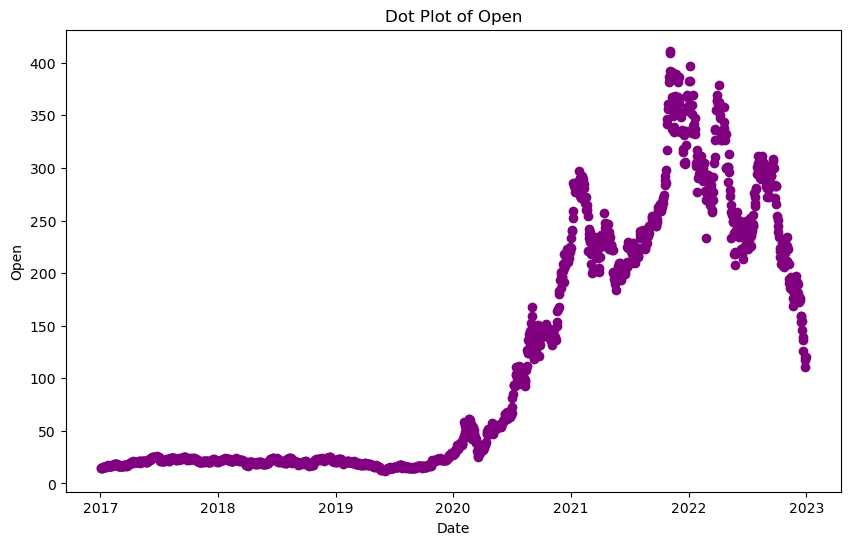

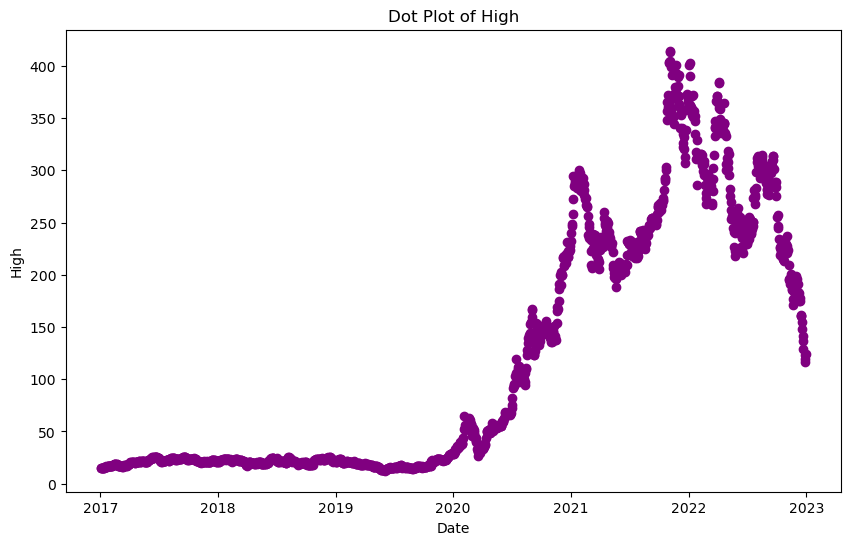

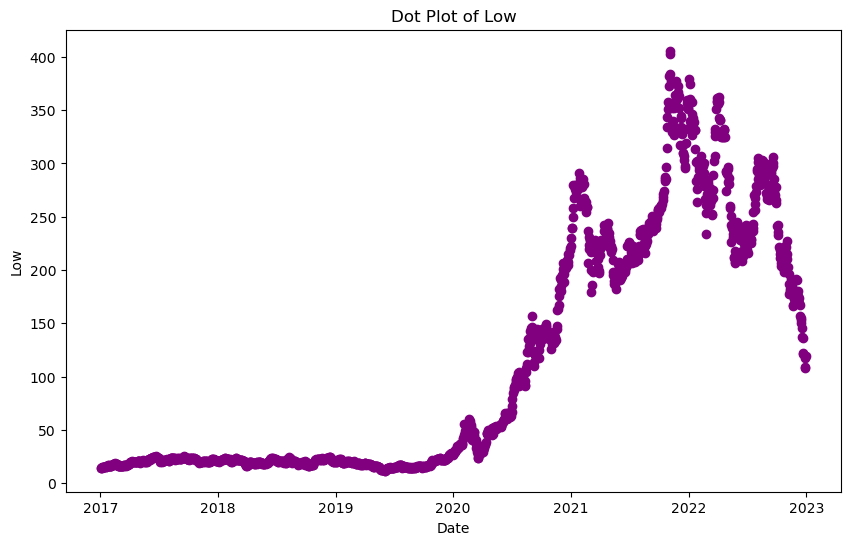

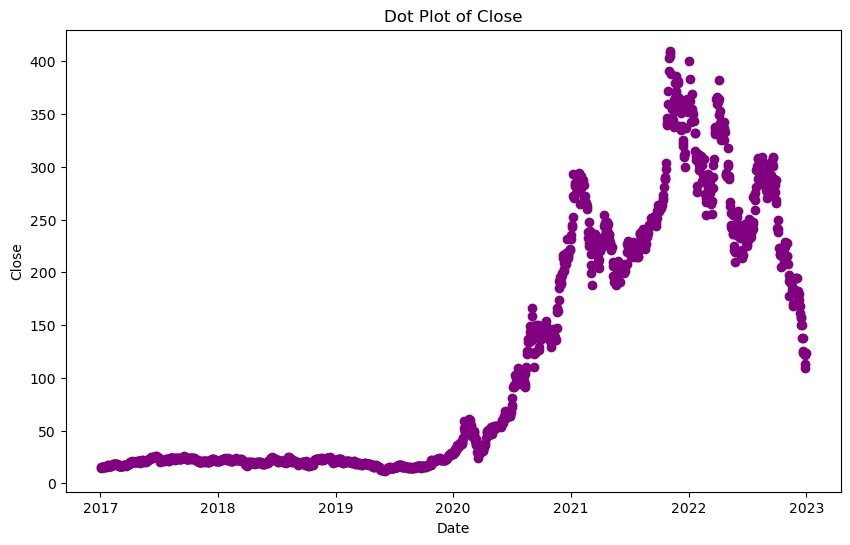

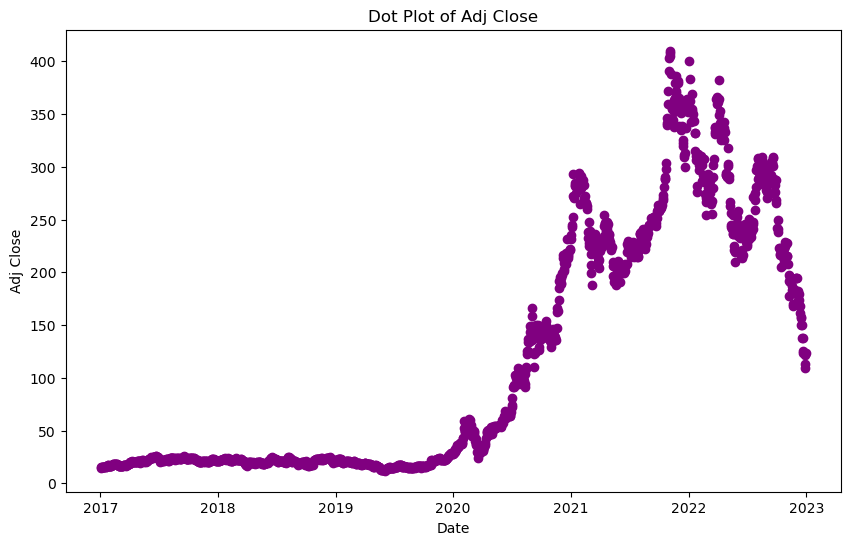

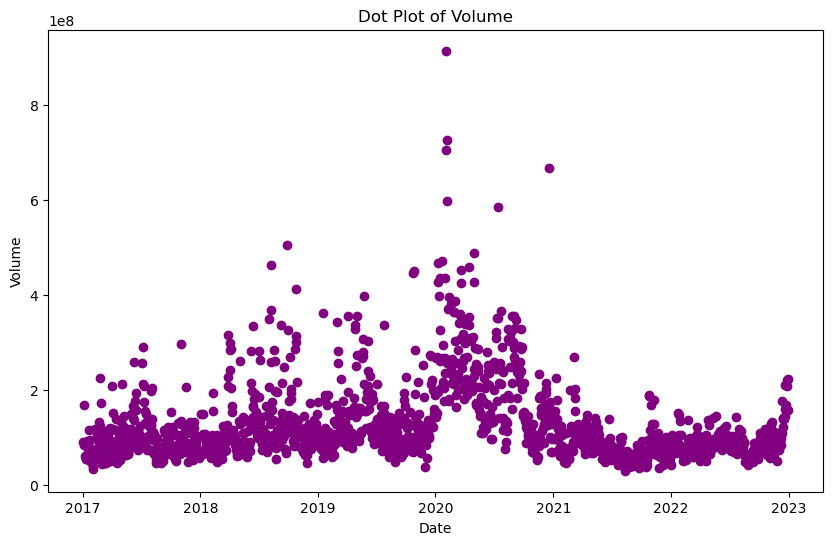

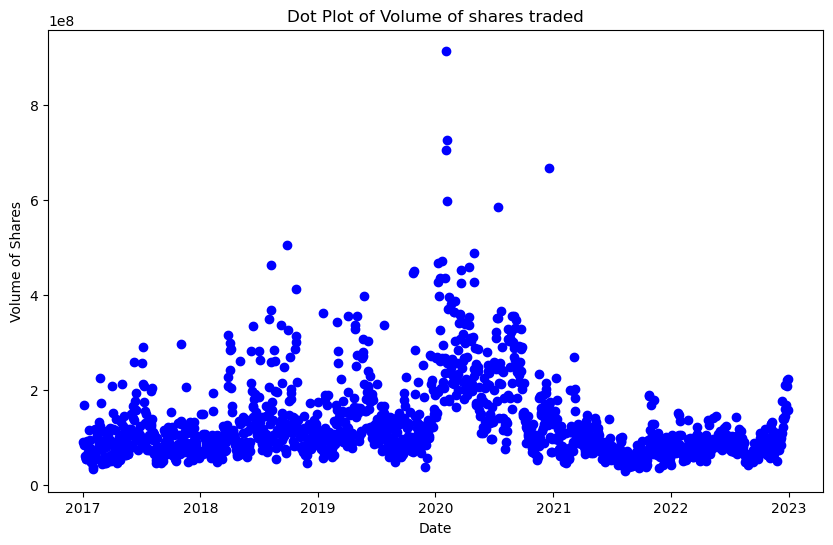

In [15]:
for i in  tsla.columns.tolist():
    plt.figure(figsize=(10, 6))
    plt.plot(tsla[i], marker='o',linestyle='None', color='purple')
    plt.title(f'Dot Plot of {i}')
    plt.xlabel('Date')
    plt.ylabel(f'{i}')
    plt.show()

#scatter plot of volumes makes sense
plt.figure(figsize=(10, 6))
plt.plot(tsla['Volume'], marker='o', linestyle='None', color='blue')
plt.title('Dot Plot of Volume of shares traded')
plt.xlabel('Date')
plt.ylabel('Volume of Shares')
plt.show()



LINE PLOTS

<Axes: xlabel='Date'>

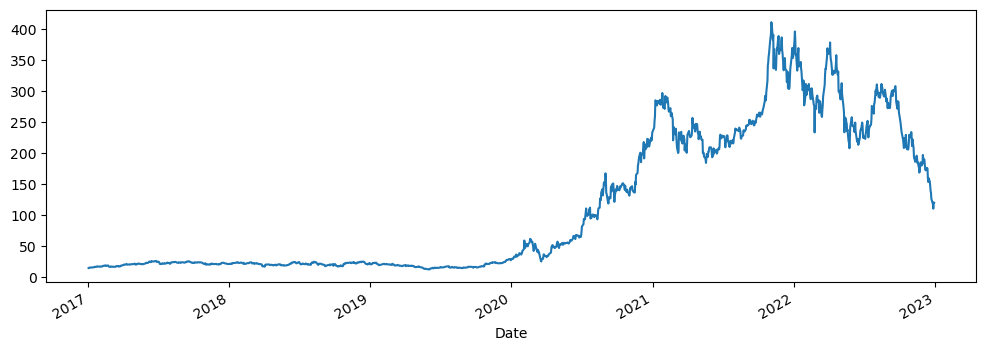

In [43]:
tsla['Open'].plot(figsize = (12,4))

In [ ]:
tsla['Close'].plot(figsize = (12,4))

In [ ]:
tsla['Volume'].plot(figsize = (12,4))

In [ ]:
tsla['High'].plot(figsize = (12,4))

<Axes: xlabel='Date'>

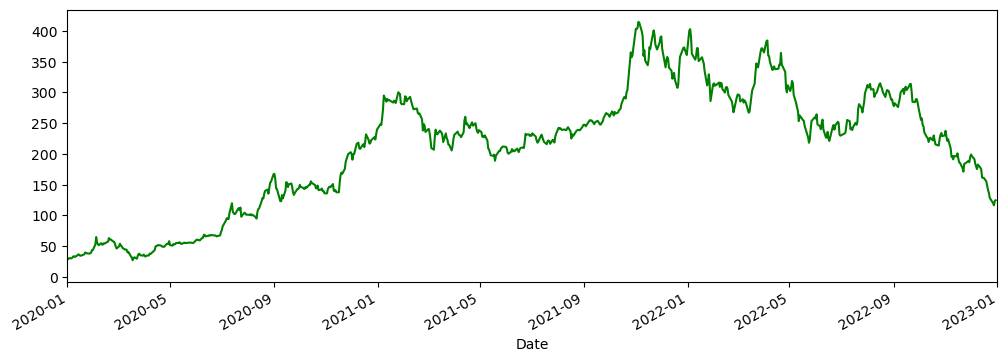

In [17]:
tsla['High'].plot(xlim = ['2020-01-01','2023-01-01'], figsize = (12,4), c ="green")
#Zooming specific data for variations

In [ ]:
tsla['Low'].plot(figsize = (12,4))

In [ ]:
tsla['Adj Close'].plot(figsize = (12,4))

STEM - LEAF 

<Figure size 2000x600 with 0 Axes>

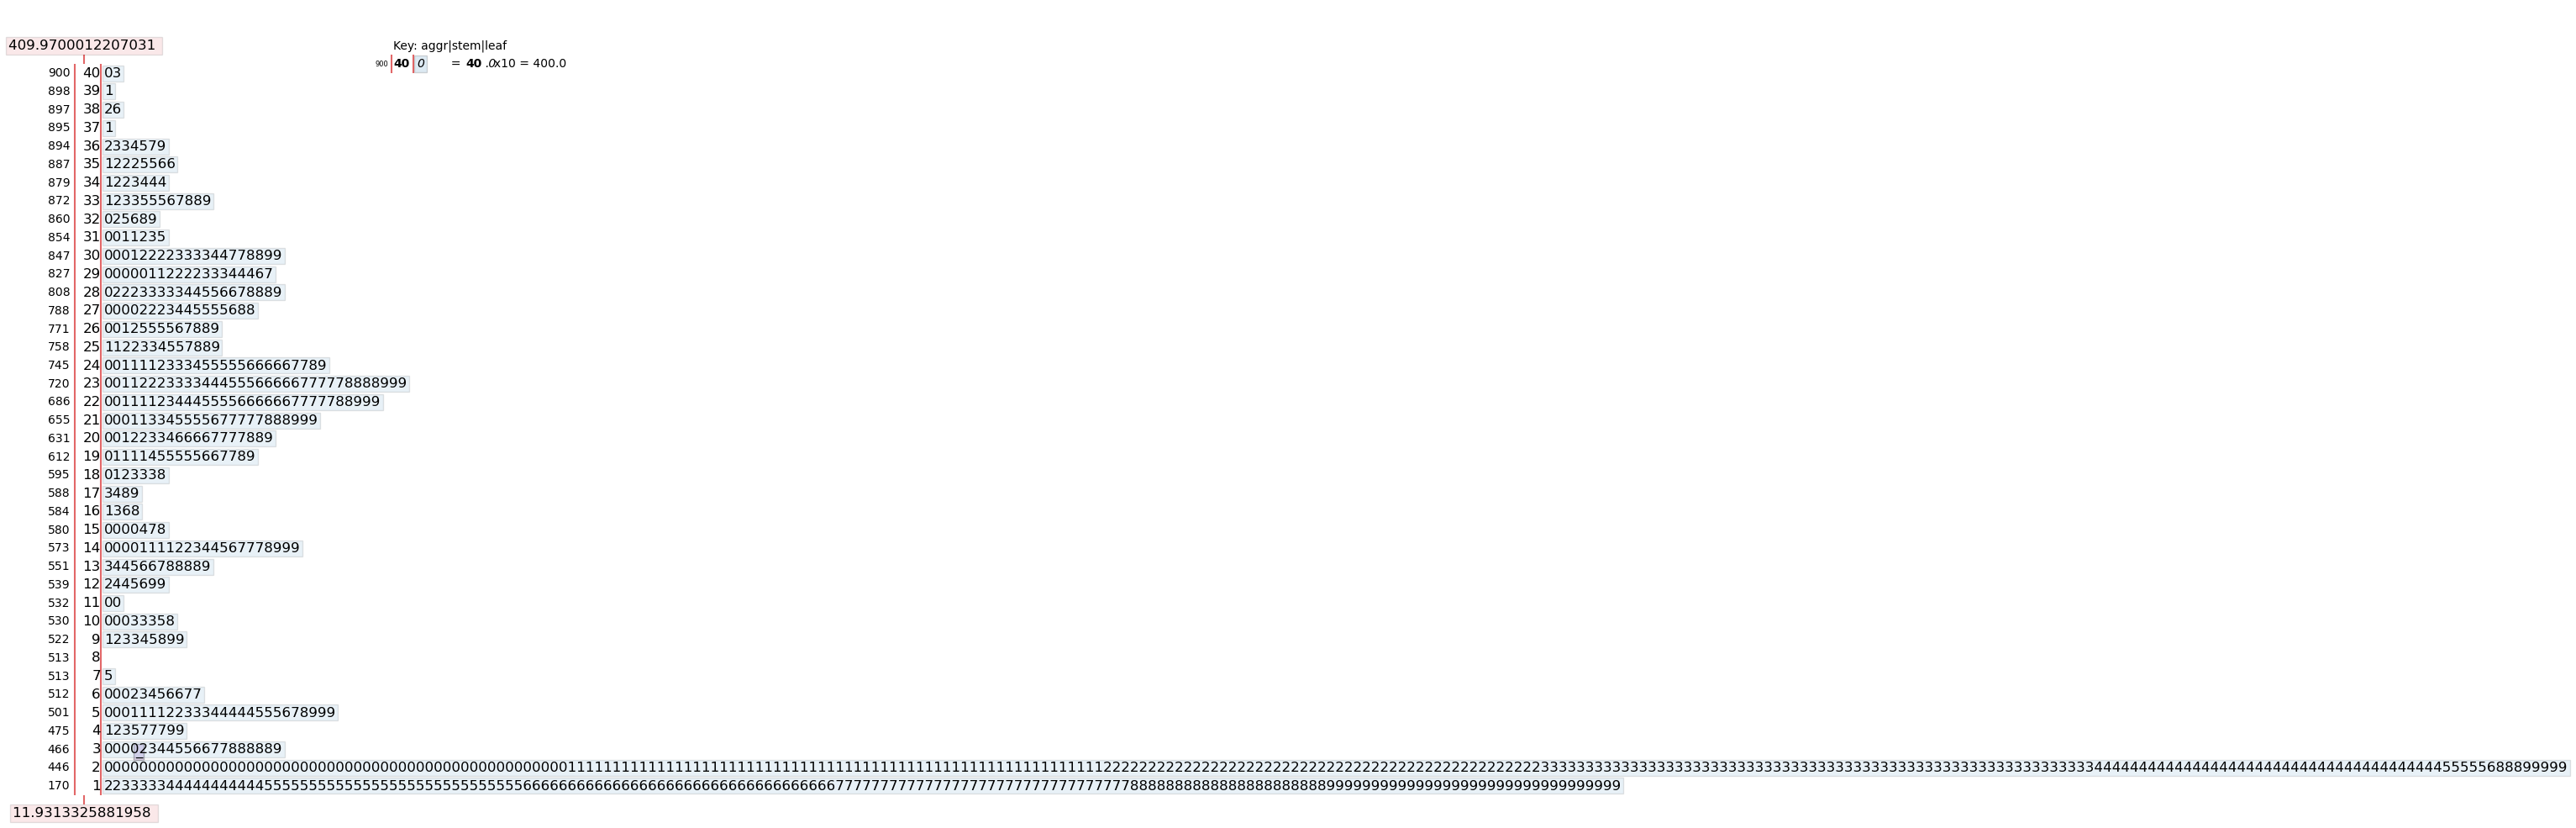

In [21]:
#stem-leaf
#!pip install stemgraphic

import stemgraphic
plt.figure(figsize=(20, 6))
stemgraphic.stem_graphic(tsla['Close'],scale=10)
plt.show()

In [ ]:
plt.figure(figsize=(20, 6))
stemgraphic.stem_graphic(tsla['Open'],scale=10)
plt.show()

PIE CHARTS

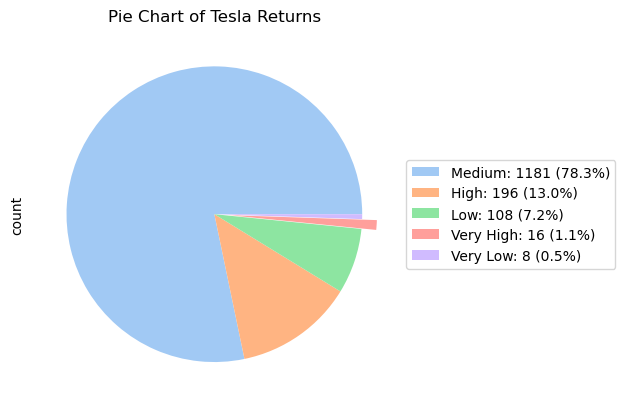

In [23]:
# Pie chart of returns classified into bins
returns = pd.cut(tsla['Close'].pct_change(), bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
explode = [0, 0, 0, 0.1, 0]  
counts = returns.value_counts()
counts.plot.pie(colors=sns.color_palette('pastel'),explode = explode,labels=None)
# Add a legend with category names and percentages
plt.legend(labels=[f'{label}: {count} ({100*count/sum(counts):.1f}%)' for label, count in counts.items()],loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Pie Chart of Tesla Returns')
plt.show()
#pct_change() - percentage change between the current and previous closing prices (daily returns)

YR END CURVES

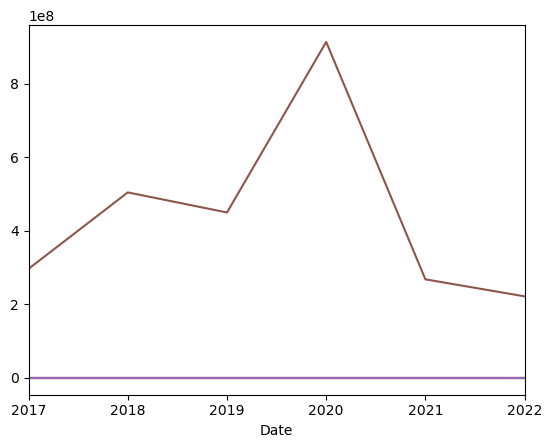

In [53]:
for i in tsla.columns.tolist():
    tsla.resample(rule='YE').max()[i].plot()

SEPARATE PLOTS

C:\Users\Admin\AppData\Local\Temp\ipykernel_1808\447319746.py:1: FutureWarning:

'A' is deprecated and will be removed in a future version, please use 'YE' instead.



<Axes: xlabel='Date'>

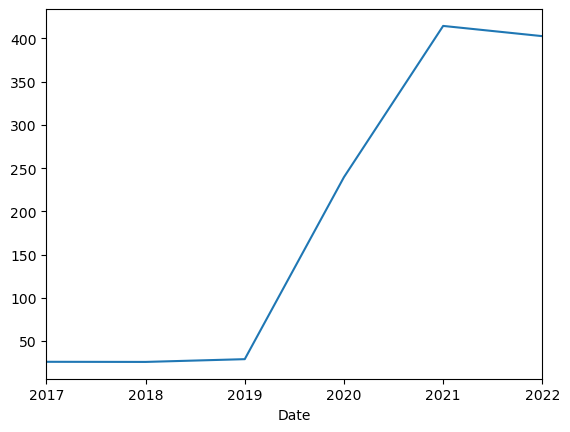

In [56]:
tsla.resample(rule='A').max()['High'].plot()

<Axes: xlabel='Date'>

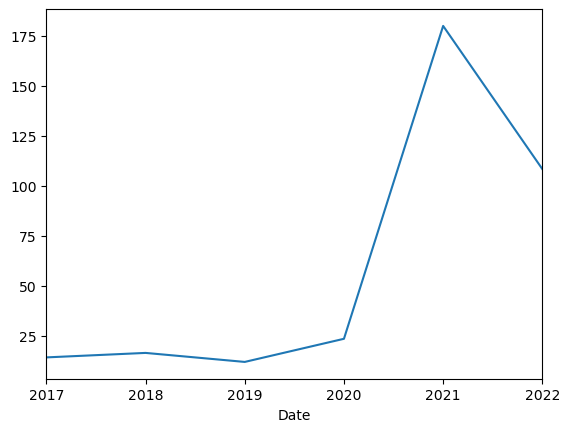

In [58]:
tsla.resample(rule='YE').min()['Low'].plot()

<Axes: xlabel='Date'>

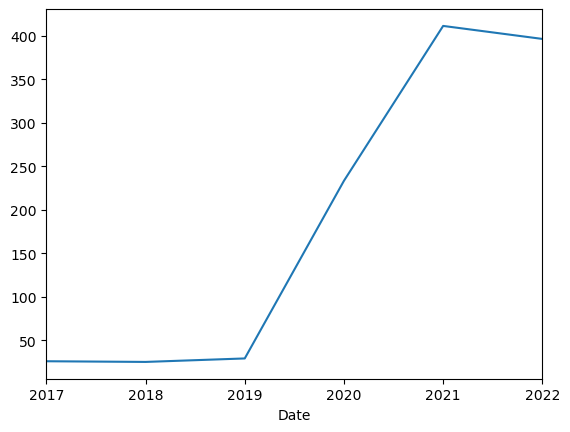

In [60]:
tsla.resample(rule='YE').max()['Open'].plot()

<Axes: xlabel='Date'>

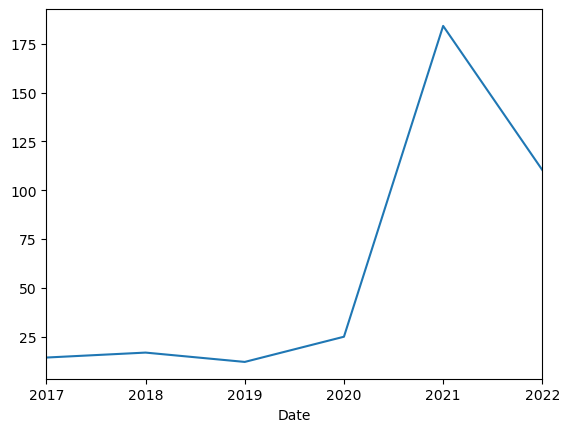

In [62]:
tsla.resample(rule='YE').min()['Open'].plot()

<Axes: xlabel='Date'>

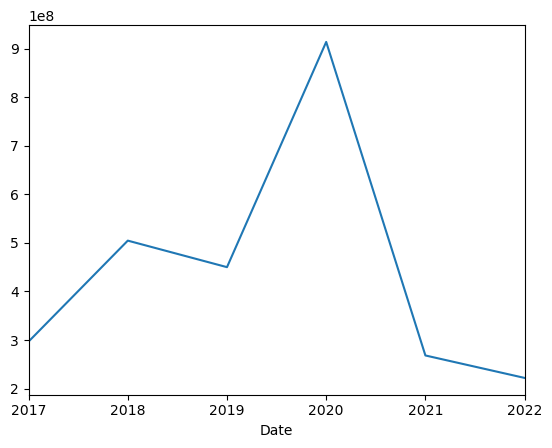

In [64]:
tsla.resample(rule='YE').max()['Volume'].plot()

<Axes: xlabel='Date'>

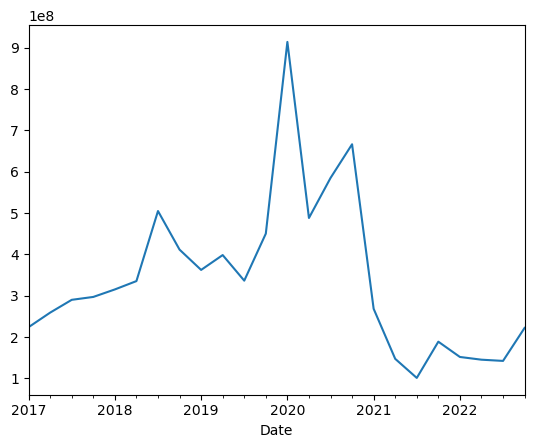

In [68]:
#QUARTERLY
tsla.resample(rule='QS').max()['Volume'].plot()

<Axes: xlabel='Date'>

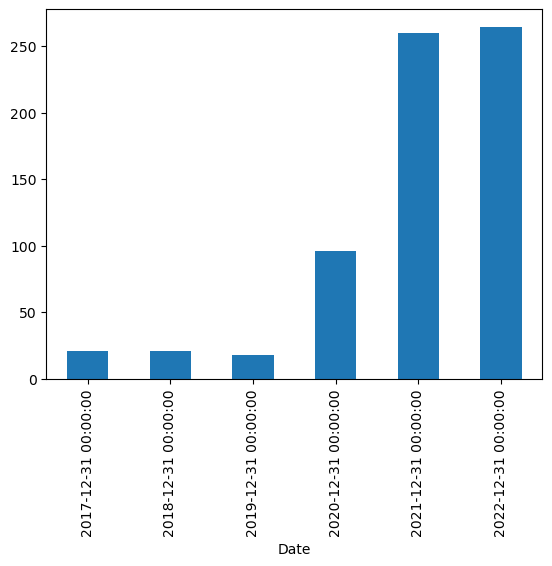

In [73]:
tsla['Open'].resample(rule='YE').mean().plot(kind='bar')

<Axes: xlabel='Date'>

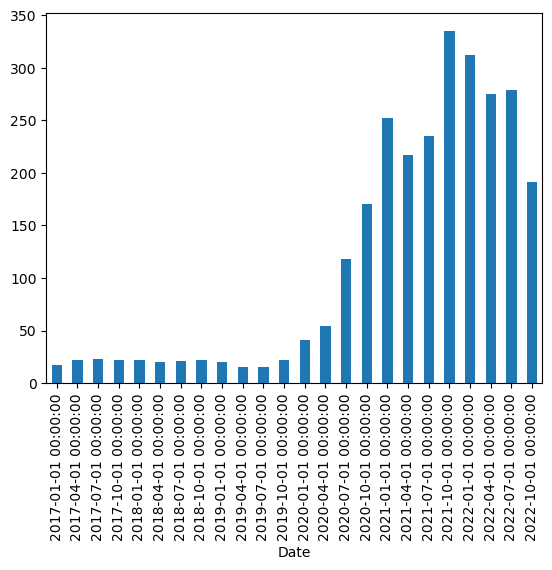

In [75]:
#quarterly mean of open prices
tsla['Open'].resample(rule='QS').mean().plot(kind='bar')

<Axes: xlabel='Date'>

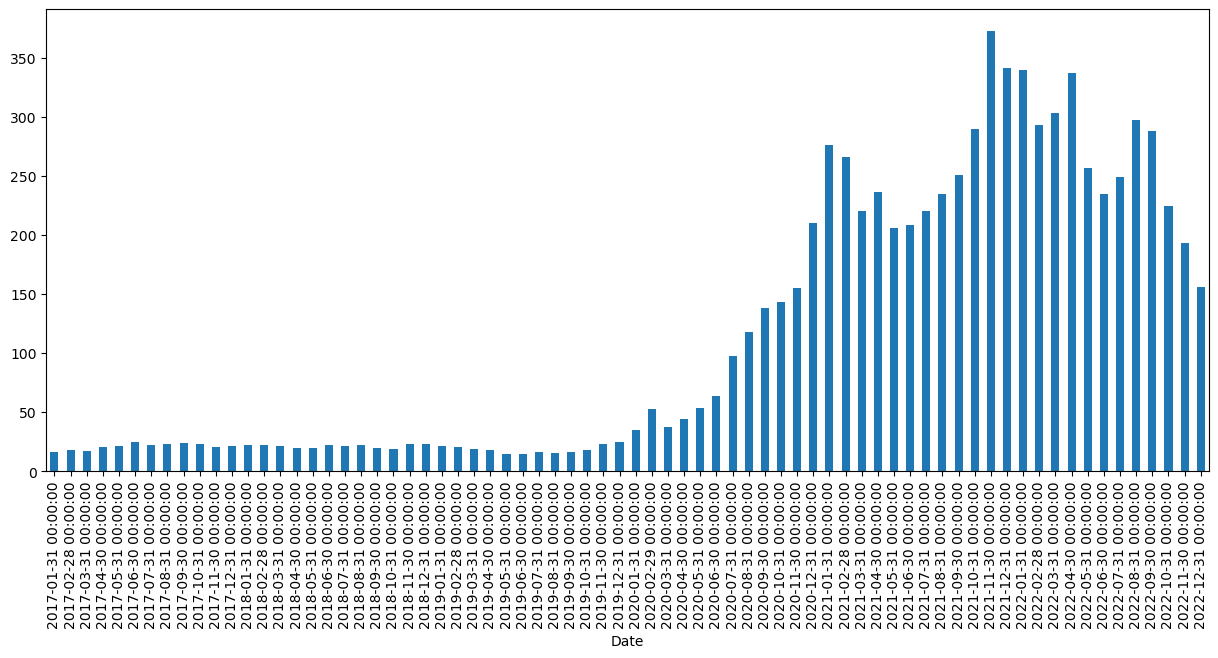

In [79]:
#Monthly
tsla['Open'].resample(rule='ME').mean().plot(kind='bar',figsize = (15,6))

<Axes: xlabel='Date'>

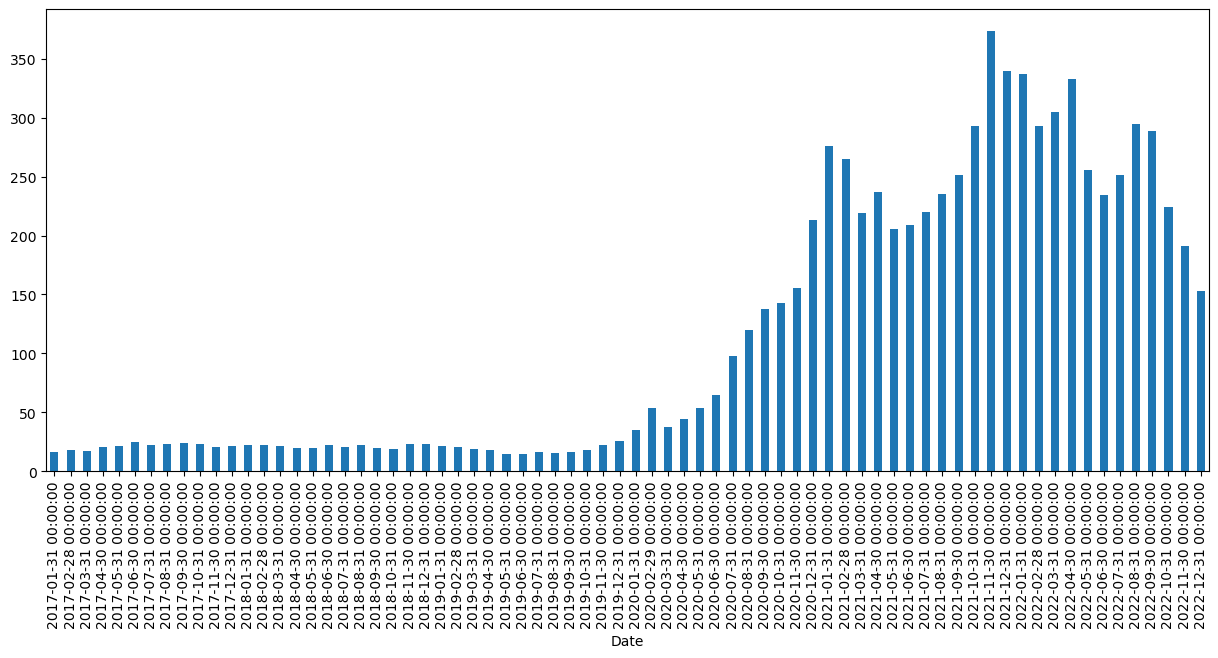

In [141]:
#Monthly
tsla['Close'].resample(rule='ME').mean().plot(kind='bar',figsize = (15,6))

Monthly Avg Volume Values

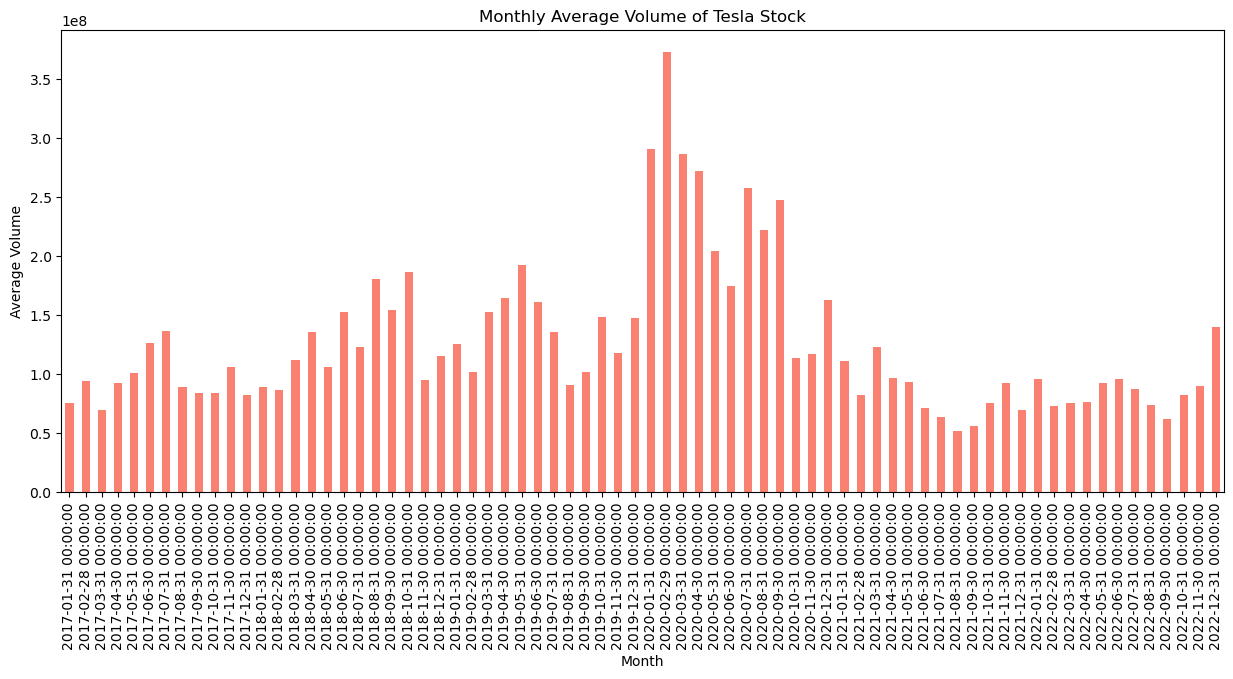

In [83]:
plt.figure()
plt.tight_layout()
tsla['Volume'].resample('ME').mean().plot(kind='bar', color='salmon',figsize = (15,6) ) #monthly
plt.title('Monthly Average Volume of Tesla Stock')
plt.xlabel('Month')
plt.ylabel('Average Volume')
plt.show()


Pareto chart

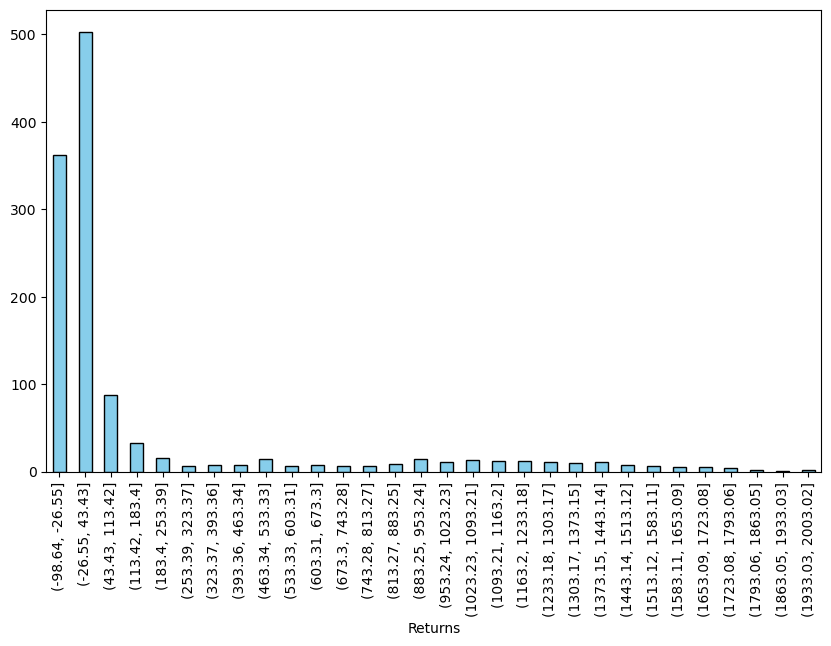

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate daily returns
tsla['Returns'] = tsla['Close'].pct_change() * 100

# Drop the first row with NaN returns
tsla = tsla.dropna()

# Sort the data based on the returns to create a Pareto chart
tsla = tsla.sort_values(by='Returns')

# Create bins for returns to reduce the density of the bars
bins = pd.cut(tsla['Returns'], bins=30, precision=2)

# Calculate the frequency for each bin
pareto_data = bins.value_counts().sort_index()

# Create the Pareto chart
plt.figure(figsize=(10, 6))
pareto_data.plot(kind='bar', color='skyblue', edgecolor='black')

# Adding cumulative percentage line
cumulative_percentage = pareto_data.cumsum() / pareto_data.sum()


CORRELATION ANALYSIS

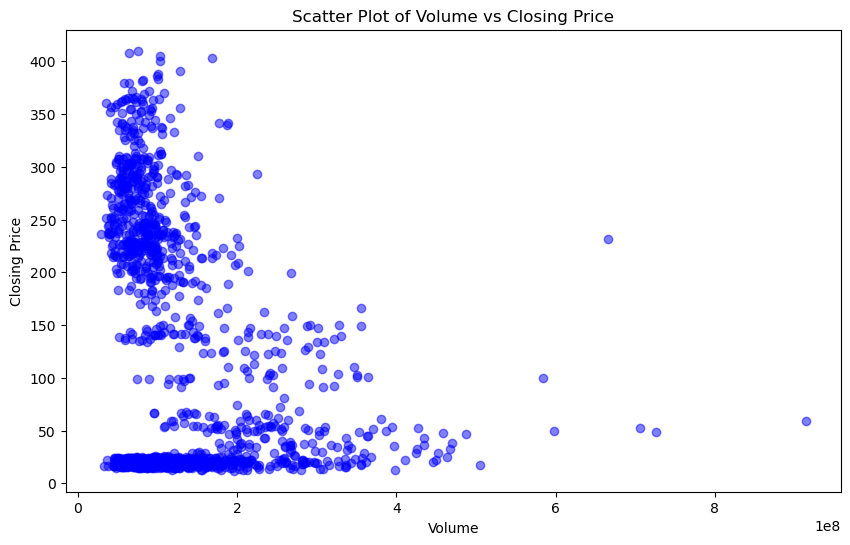

          Volume     Close
Volume  1.000000 -0.267816
Close  -0.267816  1.000000


In [87]:
plt.figure(figsize=(10, 6))
plt.scatter(tsla['Volume'], tsla['Close'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Volume vs Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.show()

# Calculate correlation
correlation = tsla[['Volume', 'Close']].corr()
print(correlation)


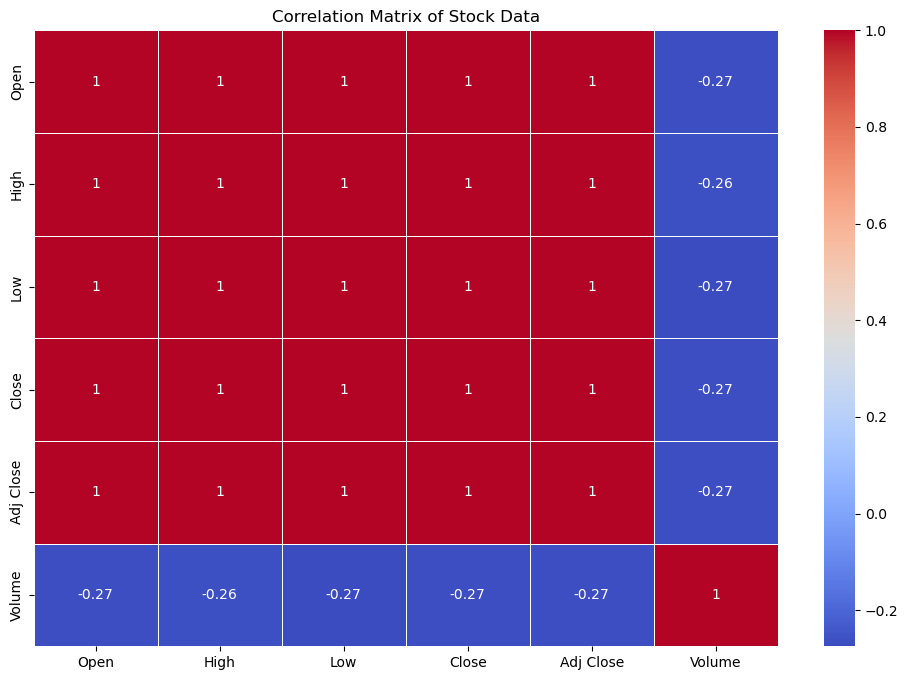

In [89]:
#MULTIVARIATE ANALYSIS
# Correlation matrix and heatmap
correlation_matrix = tsla.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Stock Data')
plt.show()



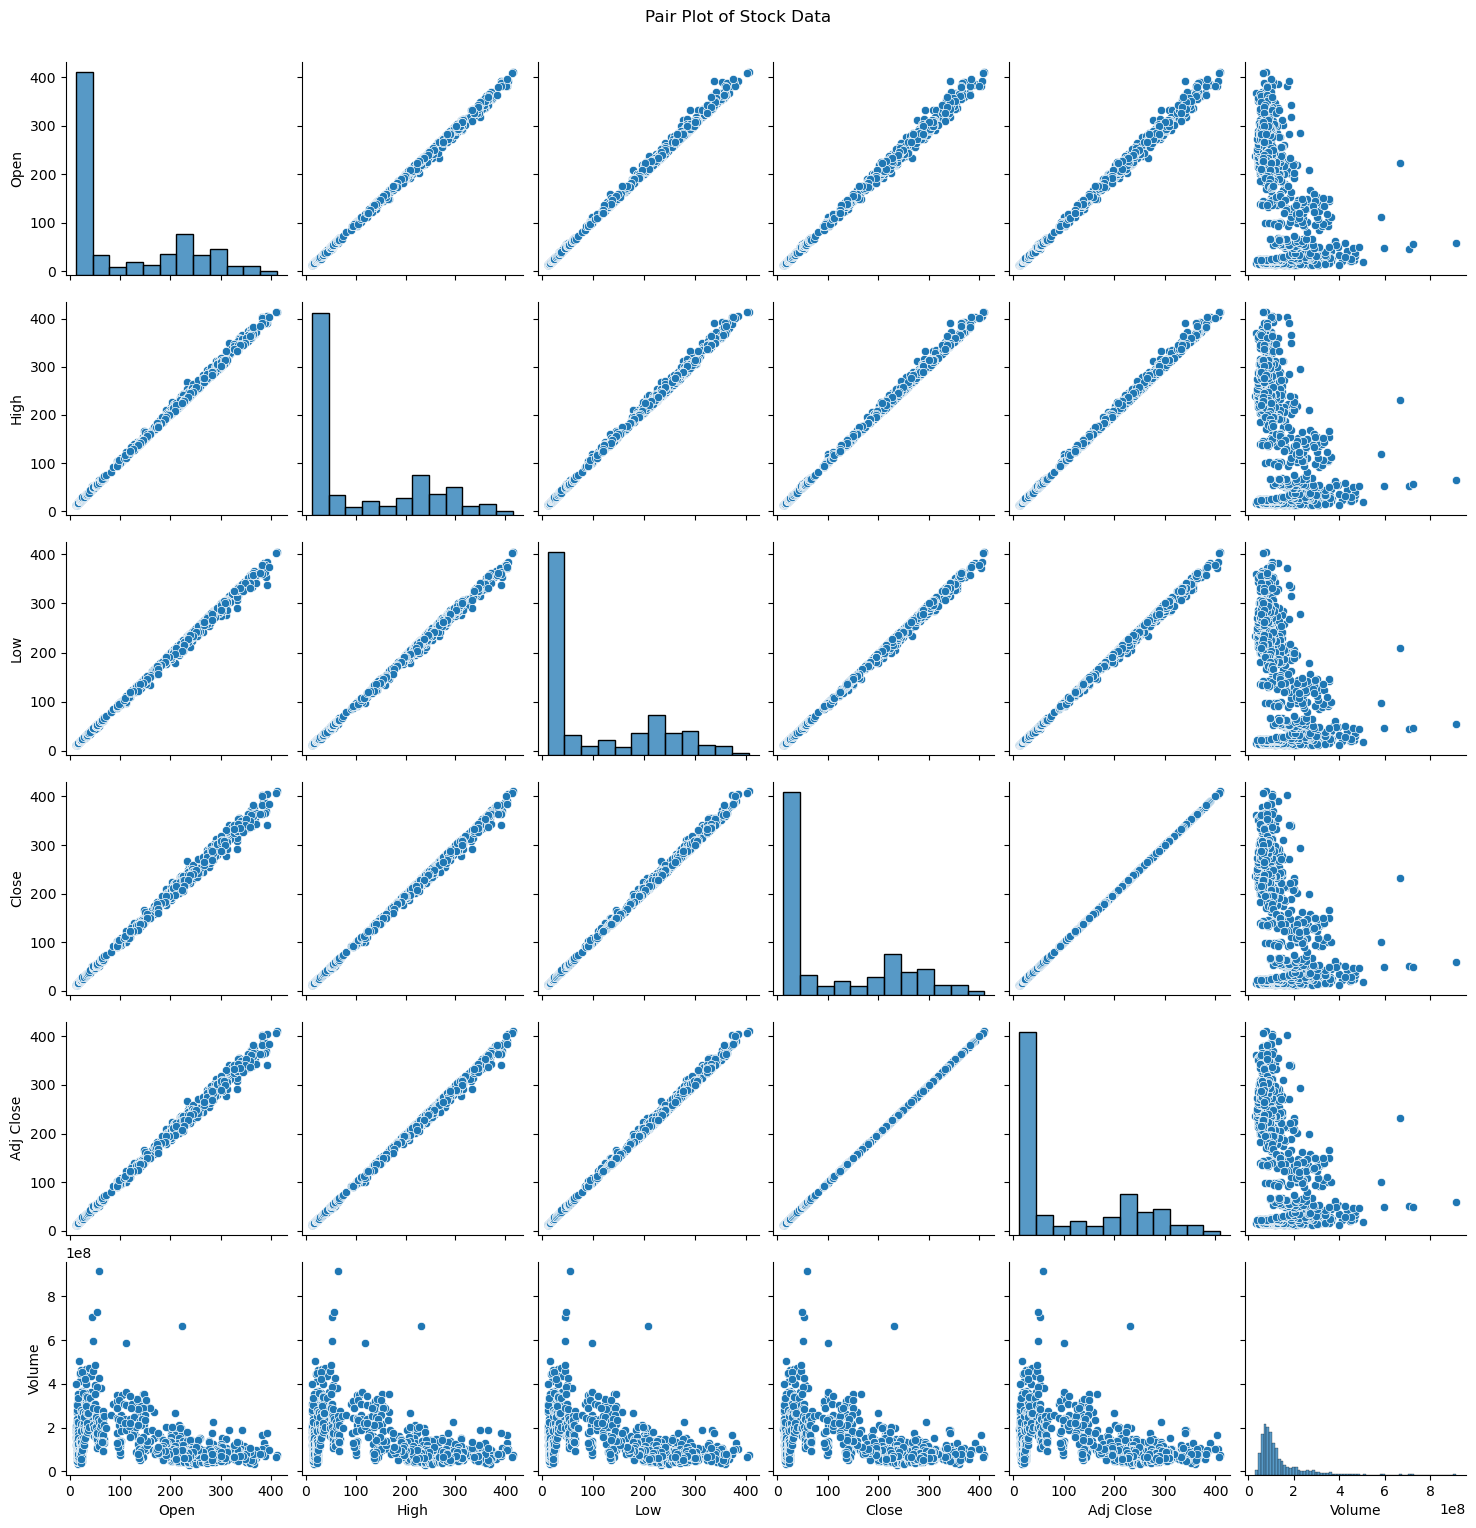

In [95]:
# Pair plot to visualize relationships between numerical variables
sns.pairplot(tsla[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])
plt.suptitle('Pair Plot of Stock Data', y=1.02)
plt.show()

In [97]:
for i in tsla.columns.tolist():
    correlation = tsla[['Volume', i]].corr()
    print(correlation)


          Volume      Open
Volume  1.000000 -0.268682
Open   -0.268682  1.000000
          Volume      High
Volume  1.000000 -0.263268
High   -0.263268  1.000000
         Volume      Low
Volume  1.00000 -0.27453
Low    -0.27453  1.00000
          Volume     Close
Volume  1.000000 -0.267816
Close  -0.267816  1.000000
             Volume  Adj Close
Volume     1.000000  -0.267816
Adj Close -0.267816   1.000000
        Volume  Volume
Volume     1.0     1.0
Volume     1.0     1.0


BOX PLOTS

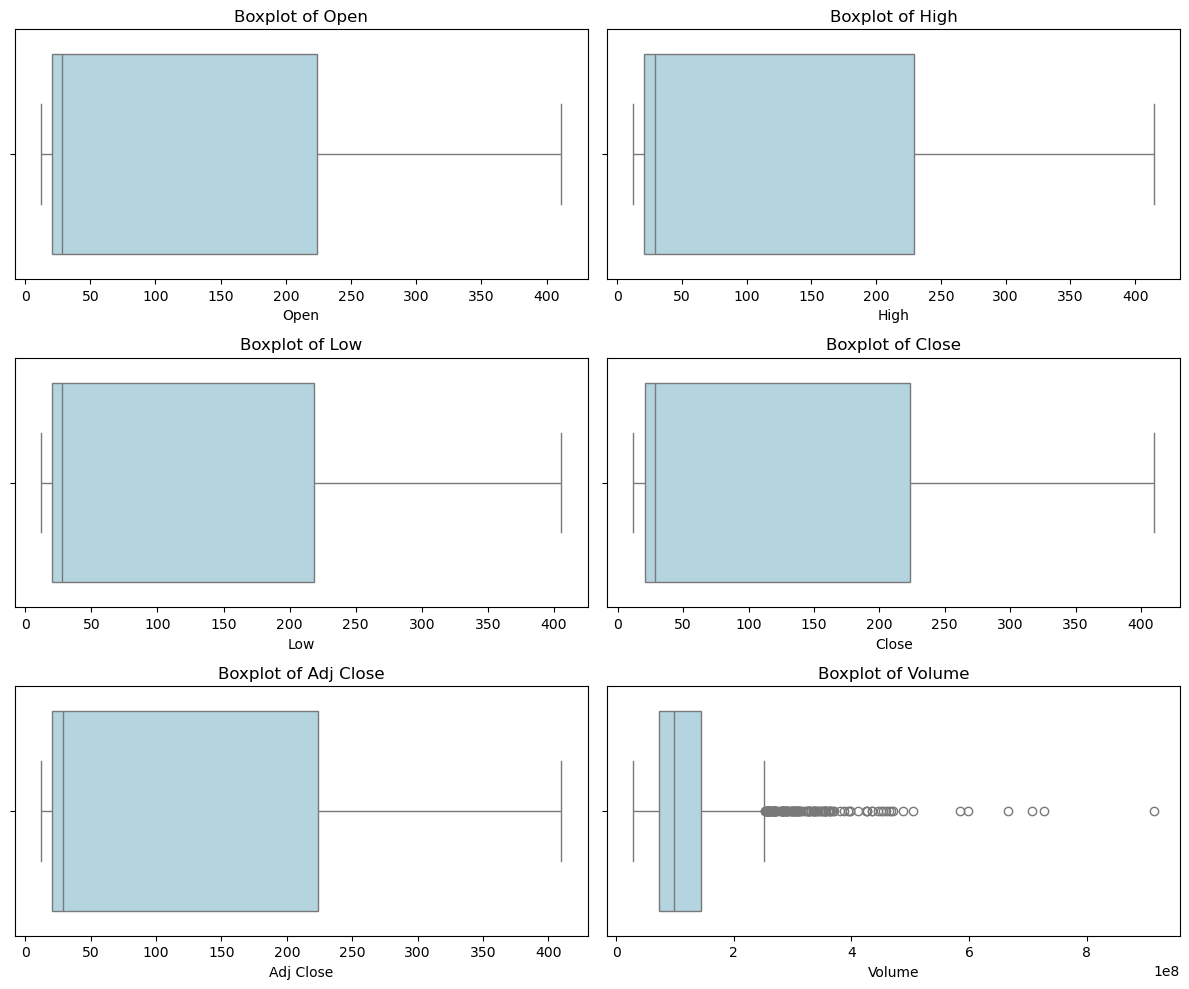

In [92]:
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

# Flatten the axes array to easily iterate over it
axes = axes.flatten()

# Loop over each dataset and its corresponding axis
for i, column in enumerate(tsla.columns.tolist()):
    sns.boxplot(x=tsla[column], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

SKEWNESS & KURTOSIS

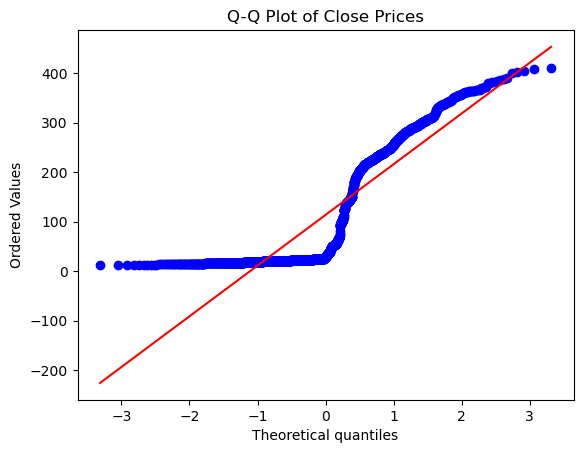

Skewness of Close Prices: 0.7508015283434581
Kurtosis of Close Prices: -0.9675373723236


In [115]:
# Q-Q plot for 'Close' prices
from scipy.stats import probplot
probplot(tsla['Close'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Close Prices')
plt.show()

# Skewness and kurtosis
print(f"Skewness of Close Prices: {tsla['Close'].skew()}")
print(f"Kurtosis of Close Prices: {tsla['Close'].kurt()}")


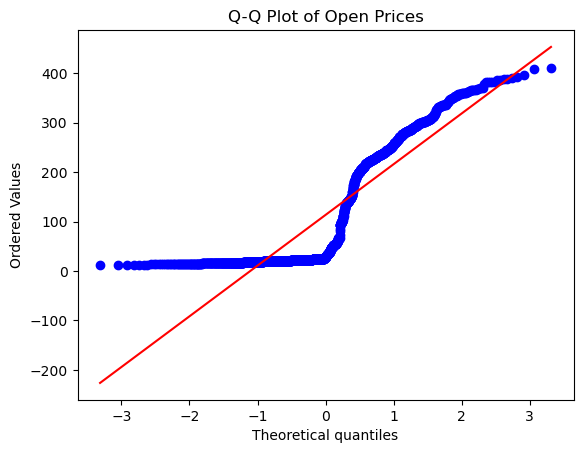

Skewness of Close Prices: 0.7518891265332056
Kurtosis of Close Prices: -0.9643331503681605


In [117]:
probplot(tsla['Open'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Open Prices')
plt.show()

# Skewness and kurtosis
print(f"Skewness of Close Prices: {tsla['Open'].skew()}")
print(f"Kurtosis of Close Prices: {tsla['Open'].kurt()}")

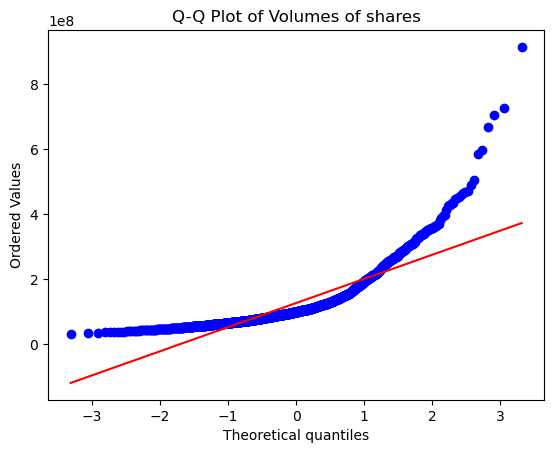

Skewness of Close Prices: 2.6425948240135653
Kurtosis of Close Prices: 11.407431297764013


In [119]:
probplot(tsla['Volume'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Volumes of shares')
plt.show()

# Skewness and kurtosis
print(f"Skewness of Close Prices: {tsla['Volume'].skew()}")
print(f"Kurtosis of Close Prices: {tsla['Volume'].kurt()}")

MOVING AVERAGE

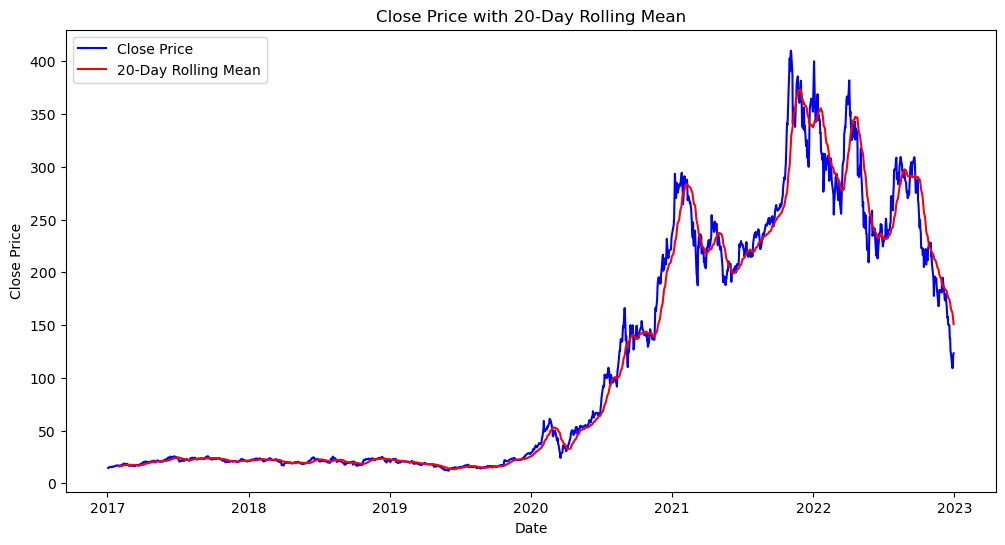

In [124]:
# Rolling mean for 'Close' prices to identify trends
tsla['Rolling_Mean_20'] = tsla['Close'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla['Close'], label='Close Price', color='blue')
plt.plot(tsla.index, tsla['Rolling_Mean_20'], label='20-Day Rolling Mean', color='red')
plt.title('Close Price with 20-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


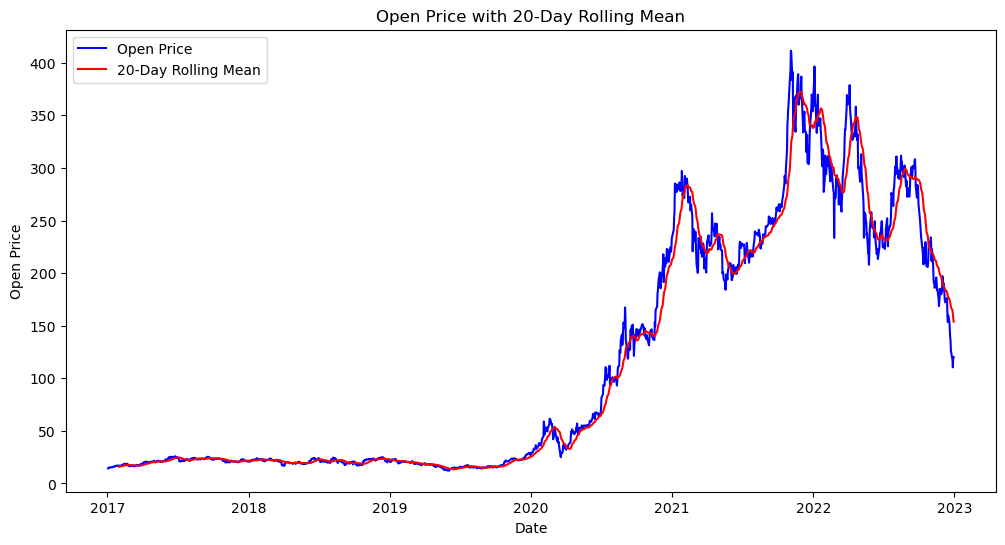

In [126]:
tsla['Rolling_Mean_20'] = tsla['Open'].rolling(window=20).mean()

plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla['Open'], label='Open Price', color='blue')
plt.plot(tsla.index, tsla['Rolling_Mean_20'], label='20-Day Rolling Mean', color='red')
plt.title('Open Price with 20-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

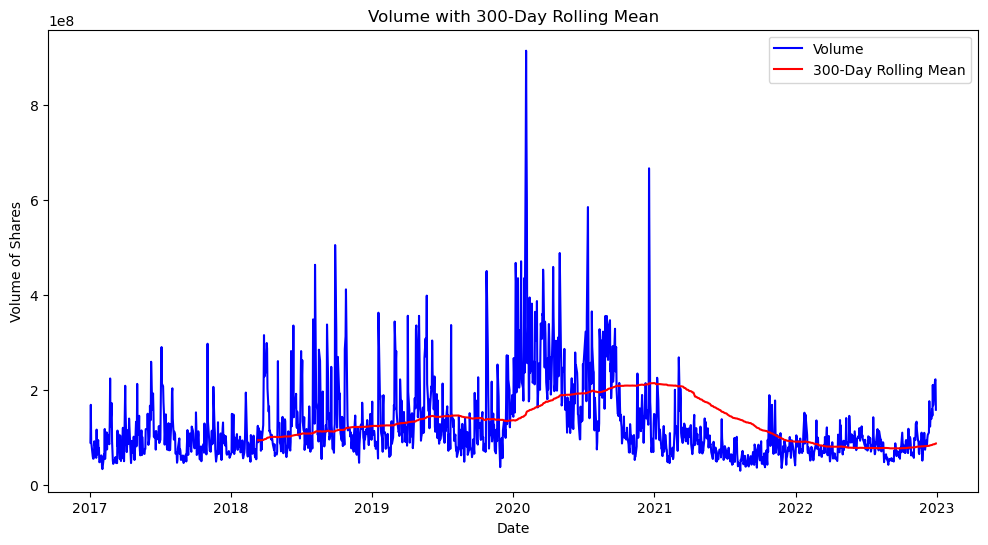

In [130]:
tsla['Rolling_Mean_300'] = tsla['Volume'].rolling(window=300).mean()

plt.figure(figsize=(12, 6))
plt.plot(tsla.index, tsla['Volume'], label='Volume', color='blue')
plt.plot(tsla.index, tsla['Rolling_Mean_300'], label='300-Day Rolling Mean', color='red')
plt.title('Volume with 300-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Volume of Shares')
plt.legend()
plt.show()

Time Series Specific Visualizations

In [ ]:
#ACF PLOT

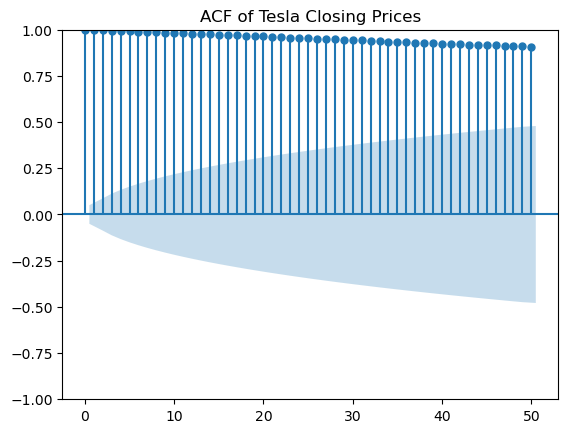

In [135]:
sm.graphics.tsa.plot_acf(tsla['Close'], lags=50)
plt.title('ACF of Tesla Closing Prices')
plt.show()


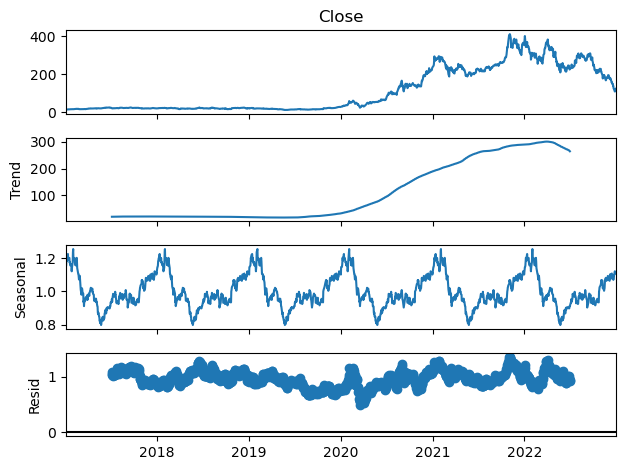

In [137]:
decomposition = sm.tsa.seasonal_decompose(tsla['Close'], model='multiplicative', period=252)  # Assuming 252 trading days in a year
fig = decomposition.plot()
plt.show()


In [139]:
#Z_SCORE ANALYSIS >> Standarised values
mean = tsla['Close'].mean()
std_dev = tsla['Close'].std()
z_score = (mode - mean) / std_dev
print(f"Z-Score of Mode: {z_score}")


Z-Score of Mode: 738539.3132374908
